In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [23]:
import os
import random
from io import BytesIO

In [3]:
base_dir = os.path.join(os.getcwd(), 'data')
print(base_dir)

e:\SELF_LEARNING\Coursera\Tensorflow\tensorflow-1-public\C1\W4\self_code\data


In [4]:
training_dir = os.path.join(base_dir, 'horse-or-human')
validation_dir = os.path.join(base_dir, 'validation-horse-or-human')

In [5]:
# check the dataa
train_horse_dir = os.path.join(training_dir, 'horses')
train_human_dir = os.path.join(training_dir, 'humans')
validation_horse_dir = os.path.join(validation_dir, 'horses')
validation_human_dir = os.path.join(validation_dir, 'humans')
no_train_horse_images = len(os.listdir(train_horse_dir))
no_train_human_images = len(os.listdir(train_human_dir))
no_validation_horse_images = len(os.listdir(validation_horse_dir))
no_validation_human_images = len(os.listdir(validation_human_dir))
print(f'Number of horse images in training dataset: {no_train_horse_images}')
print(f'Number of human images in training dataset: {no_train_human_images}')
print(f'Number of horse images in validation dataset: {no_validation_horse_images}')
print(f'Number of human images in validation dataset: {no_validation_human_images}')

Number of horse images in training dataset: 500
Number of human images in training dataset: 527
Number of horse images in validation dataset: 128
Number of human images in validation dataset: 128


In [6]:
print(f'First 10 training horse images names: {', '.join(os.listdir(train_horse_dir)[:10])}.')
print(f'First 10 training human images names: {', '.join(os.listdir(train_human_dir)[:10])}.')
print(f'First 10 validation horse images names: {', '.join(os.listdir(validation_horse_dir)[:10])}.')
print(f'First 10 validation human images names: {', '.join(os.listdir(validation_human_dir)[:10])}.')

First 10 training horse images names: horse01-0.png, horse01-1.png, horse01-2.png, horse01-3.png, horse01-4.png, horse01-5.png, horse01-6.png, horse01-7.png, horse01-8.png, horse01-9.png.
First 10 training human images names: human01-00.png, human01-01.png, human01-02.png, human01-03.png, human01-04.png, human01-05.png, human01-06.png, human01-07.png, human01-08.png, human01-09.png.
First 10 validation horse images names: horse1-000.png, horse1-105.png, horse1-122.png, horse1-127.png, horse1-170.png, horse1-204.png, horse1-224.png, horse1-241.png, horse1-264.png, horse1-276.png.
First 10 validation human images names: valhuman01-00.png, valhuman01-01.png, valhuman01-02.png, valhuman01-03.png, valhuman01-04.png, valhuman01-05.png, valhuman01-06.png, valhuman01-07.png, valhuman01-08.png, valhuman01-09.png.


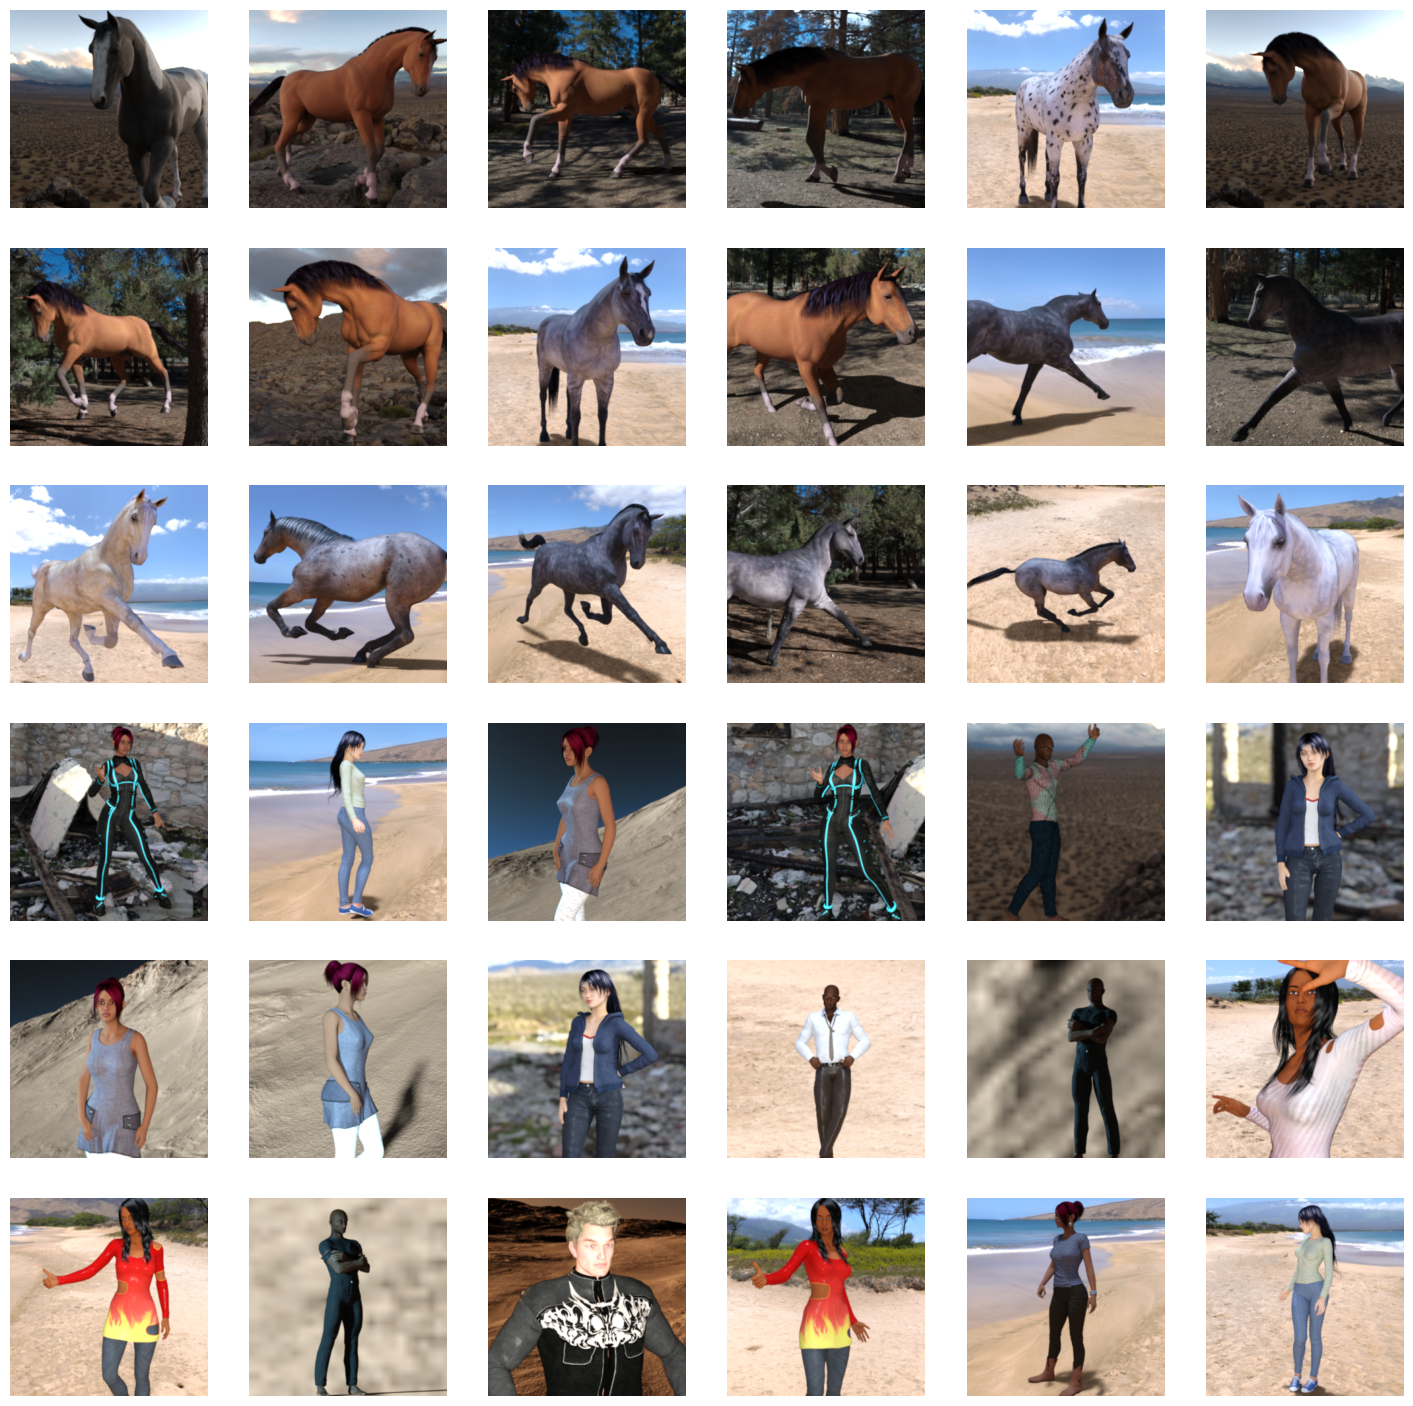

In [7]:
# print images for visualisation
nrows = 6
ncols = 6

fig = plt.figure()
fig = fig.set_size_inches(nrows * 3, ncols * 3)

horse_images = [os.path.join(train_horse_dir,os.listdir(train_horse_dir)[i]) for i in np.random.randint(0, no_train_horse_images, 18)]
human_images = [os.path.join(train_human_dir,os.listdir(train_human_dir)[i]) for i in np.random.randint(0, no_train_human_images, 18)]

for i, picture in enumerate(horse_images + human_images):
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('Off')
    img = mpimg.imread(picture)
    plt.imshow(img)
plt.show()

In [8]:
# Create training and validation datasets from directory
training_data = tf.keras.utils.image_dataset_from_directory(training_dir,
                                                            image_size = (300,300),
                                                            batch_size = 32,
                                                            label_mode = 'binary')
validation_data = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                            image_size = (300,300),
                                                            batch_size = 32,
                                                            label_mode = 'binary')

Found 1027 files belonging to 2 classes.
Found 256 files belonging to 2 classes.


In [9]:
# Get one batch from the dataset
sample_batch = list(training_data.take(1))[0]

# Check that the output is a pair
print(f'sample batch data type: {type(sample_batch)}')
print(f'number of elements: {len(sample_batch)}')

# Extract image and label
image_batch = sample_batch[0]
label_batch = sample_batch[1]

# Check the shapes
print(f'image batch shape: {image_batch.shape}')
print(f'label batch shape: {label_batch.shape}')

sample batch data type: <class 'tuple'>
number of elements: 2
image batch shape: (32, 300, 300, 3)
label batch shape: (32, 1)


In [10]:
print(f'max value: {np.max(image_batch.numpy())}')
print(f'min value: {np.min(image_batch.numpy())}')

max value: 255.0
min value: 0.0


In [11]:
# Normalisation (rescale data to range [0,1])
rescale_data = tf.keras.layers.Rescaling(1./255)
training_data_scaled = training_data.map(lambda image, label: (rescale_data(image), label))
validation_data_scaled = validation_data.map(lambda image, label: (rescale_data(image), label))


In [12]:
SHUFFLE_BUFFER_SIZE = 1000
PREFETCH_BUFFER_SIZE = tf.data.AUTOTUNE

training_data_final = (training_data_scaled. cache().shuffle(SHUFFLE_BUFFER_SIZE).prefetch(PREFETCH_BUFFER_SIZE))
validation_data_final = (validation_data_scaled. cache().shuffle(SHUFFLE_BUFFER_SIZE).prefetch(PREFETCH_BUFFER_SIZE))

# MODEL BUILDING

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(300,300,3)),
    tf.keras.layers.Conv2D(16, (3,3), activation= 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation= 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation= 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation= 'relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 298, 298, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 149, 149, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 147, 147, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 73, 73, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 35, 35, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 78400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    10,035,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,059,041 (38.37 MB)

 Trainable params: 10,059,041 (38.37 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(loss='binary_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001),
              metrics= ['accuracy'])

In [ ]:
class early_stop_callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = None):
        '''Stop training when the accuraccy is greater than 98%
        epoch: integer - the interation where the model is being trained
        logs: dict - keep all the training metrics'''

        if logs['accuracy'] > 0.98:
            print('stop training when the accuracy is greater than 90%')
            self.model.stop_training = True
            



In [17]:
history = model.fit(training_data_final,
          epochs = 15,
          validation_data = validation_data_final,
          verbose = 2,
          callbacks = [early_stop_callback()]
          )

Epoch 1/15
33/33 - 10s - 301ms/step - accuracy: 0.5842 - loss: 1.0648 - val_accuracy: 0.5547 - val_loss: 0.6715
Epoch 2/15
33/33 - 6s - 185ms/step - accuracy: 0.8471 - loss: 0.3506 - val_accuracy: 0.7305 - val_loss: 1.6974
Epoch 3/15
33/33 - 6s - 177ms/step - accuracy: 0.9698 - loss: 0.0815 - val_accuracy: 0.8086 - val_loss: 1.8891
Epoch 4/15
33/33 - 6s - 178ms/step - accuracy: 0.9494 - loss: 0.1769 - val_accuracy: 0.7734 - val_loss: 2.5747
Epoch 5/15
33/33 - 6s - 181ms/step - accuracy: 0.9786 - loss: 0.0606 - val_accuracy: 0.8281 - val_loss: 1.8893
Epoch 6/15
stop training when the accuracy is greater than 90%
33/33 - 6s - 177ms/step - accuracy: 0.9942 - loss: 0.0146 - val_accuracy: 0.8164 - val_loss: 2.8285


In [18]:
history.history


{'accuracy': [0.5842258930206299,
  0.8471275568008423,
  0.9698150157928467,
  0.949367105960846,
  0.9785783886909485,
  0.9941577315330505],
 'loss': [1.0648099184036255,
  0.3506004214286804,
  0.08145416527986526,
  0.17685982584953308,
  0.06056549772620201,
  0.014586655423045158],
 'val_accuracy': [0.5546875,
  0.73046875,
  0.80859375,
  0.7734375,
  0.828125,
  0.81640625],
 'val_loss': [0.6714677214622498,
  1.6974409818649292,
  1.8890855312347412,
  2.574683904647827,
  1.8892722129821777,
  2.8284831047058105]}

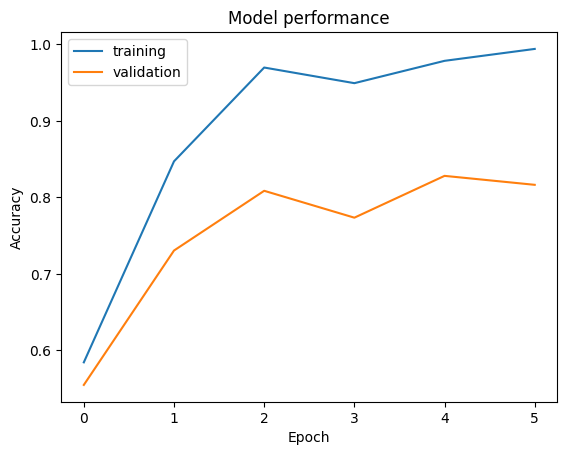

In [19]:
training_performance = history.history['accuracy']
validation_performance = history.history['val_accuracy']
plt.figure()
plt.plot(training_performance, label='training')
plt.plot(validation_performance, label = 'validation')
plt.title('Model performance')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [20]:
import ipywidgets as widgets

In [26]:
uploader = widgets.FileUpload(accept = 'jpg', multiple = True)
display(uploader)
out = widgets.Output()
display(out)

def file_predict(filename, file, out):
    image = tf.keras.utils.load_img(file,target_size=(300,300))
    image = tf.keras.utils.img_to_array(image)
    image = rescale_data(image)
    image = np.expand_dims(image, axis=0)
    
    prediction = model.predict(image, verbose=0)[0][0]
    
    with out:
        if prediction > 0.5:
            print(filename + " is a human")
        else:
            print(filename + " is a horse")

def on_upload_change(change):
    """ A function for geting files from the widget and running the prediction."""
    # Get the newly uploaded file(s)
    
    items = change.new
    for item in items: # Loop if there is more than one file uploaded  
        file_jpgdata = BytesIO(item.content)
        file_predict(item.name, file_jpgdata, out)

# Run the interactive widget
# Note: it may take a bit after you select the image to upload and process before you see the output.
uploader.observe(on_upload_change, names='value')

FileUpload(value=(), accept='jpg', description='Upload', multiple=True)

Output()